In [ ]:
import numpy as np
import pandas as pd

# Constants
a1 = 1
a2 = 1
num_samples = 1000  # Number of samples for training and testing

# Generate random joint angles within a reasonable range
theta1_train = np.random.uniform(-np.pi, np.pi, num_samples)
theta2_train = np.random.uniform(-np.pi, np.pi, num_samples)
theta1_test = np.random.uniform(-np.pi, np.pi, num_samples)
theta2_test = np.random.uniform(-np.pi, np.pi, num_samples)

# Calculate end effector positions for training and testing
x_train = a1 * np.cos(theta1_train) + a2 * np.cos(theta1_train + theta2_train)
y_train = a1 * np.sin(theta1_train) + a2 * np.sin(theta1_train + theta2_train)
x_test = a1 * np.cos(theta1_test) + a2 * np.cos(theta1_test + theta2_test)
y_test = a1 * np.sin(theta1_test) + a2 * np.sin(theta1_test + theta2_test)

# Create DataFrames for training and testing datasets
train_df = pd.DataFrame({'Theta1': theta1_train, 'Theta2': theta2_train, 'X': x_train, 'Y': y_train})
test_df = pd.DataFrame({'Theta1': theta1_test, 'Theta2': theta2_test, 'X': x_test, 'Y': y_test})

# Save datasets to CSV files
train_df.to_csv('training_data.csv', index=False)
test_df.to_csv('testing_data.csv', index=False)

def forward_kinematics(theta1, theta2):
    x = a1 * np.cos(theta1) + a2 * np.cos(theta1 + theta2)
    y = a1 * np.sin(theta1) + a2 * np.sin(theta1 + theta2)
    return x, y
print("Datasets saved successfully.")


Datasets saved successfully.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),  # Input layer with 2 neurons (x, y)
    Dense(32, activation='relu'),                   # Hidden layer with 32 neurons and ReLU activation
    Dense(2)                                        # Output layer with 2 neurons (θ1, θ2)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,338 (9.13 KB)

 Trainable params: 2,338 (9.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the training dataset
train_data = pd.read_csv('training_data.csv')

# Split the data into input (x, y) and target (θ1, θ2)
x_train = train_data[['X', 'Y']].values
y_train = train_data[['Theta1', 'Theta2']].values

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),  # Input layer
    Dense(32, activation='relu'),                   # Hidden layer
    Dense(2)                                        # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on training data
train_loss = model.evaluate(x_train, y_train)
print("Training Loss:", train_loss)

# Save the trained model
model.save('inverse_kinematics_model.h5')

print("Model trained and saved successfully.")


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.2333 - val_loss: 2.8326
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9620 - val_loss: 2.7333
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8983 - val_loss: 2.7314
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8924 - val_loss: 2.7294
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9394 - val_loss: 2.7276
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8002 - val_loss: 2.7253
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9790 - val_loss: 2.7241
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7877 - val_loss: 2.7250
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8401 - val_loss: 2.7209
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8010 - val_loss: 2.7219
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7167 - val_loss: 2.7174
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8090 - val_loss: 2.7216

Training Loss: 2.7078003883361816
Model trained and saved successfully.


32/32 - 0s - 2ms/step - loss: 14.0112
Test Loss: 14.011186599731445
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error: 3.1132727307182515


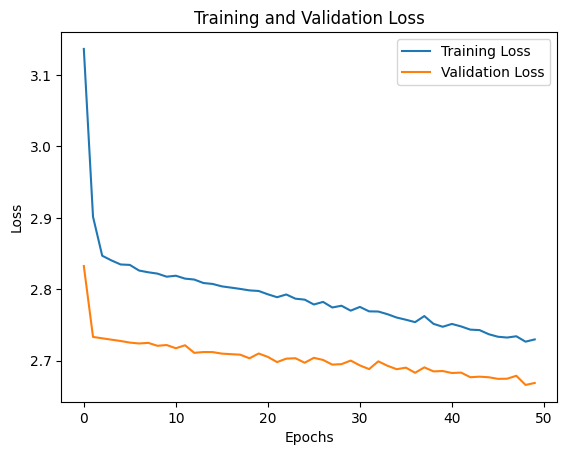

In [ ]:
import matplotlib.pyplot as plt


# Generate Joint Angles in [0 :2*pi] Range For Testing
joint_angles_test = np.random.uniform(0, 2 * np.pi, size=(num_samples, 2))
end_effector_positions_test = np.array([forward_kinematics(theta1, theta2) for theta1, theta2 in joint_angles_test])

# Create DataFrame for testing dataset and save it to CSV
test = pd.DataFrame(np.hstack((joint_angles_test, end_effector_positions_test)), columns=['theta1', 'theta2', 'x', 'y'])
test.to_csv('testing_dataset.csv', index=False)

# Load Testing Dataset From testing_dataset.csv
test = pd.read_csv('testing_dataset.csv')
x_test = test[['x', 'y']].values
y_test = test[['theta1', 'theta2']].values

# Evaluate the model on testing data
loss = model.evaluate(x_test, y_test, verbose=2)
print(f'Test Loss: {loss}')

# Predict joint angles for testing data
y_pred = model.predict(x_test)

# Calculate Mean Absolute Error
mae = np.mean(np.abs(y_test - y_pred))
print(f"Mean Absolute Error: {mae}")

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Mean Absolute Error: 3.1132727307182515


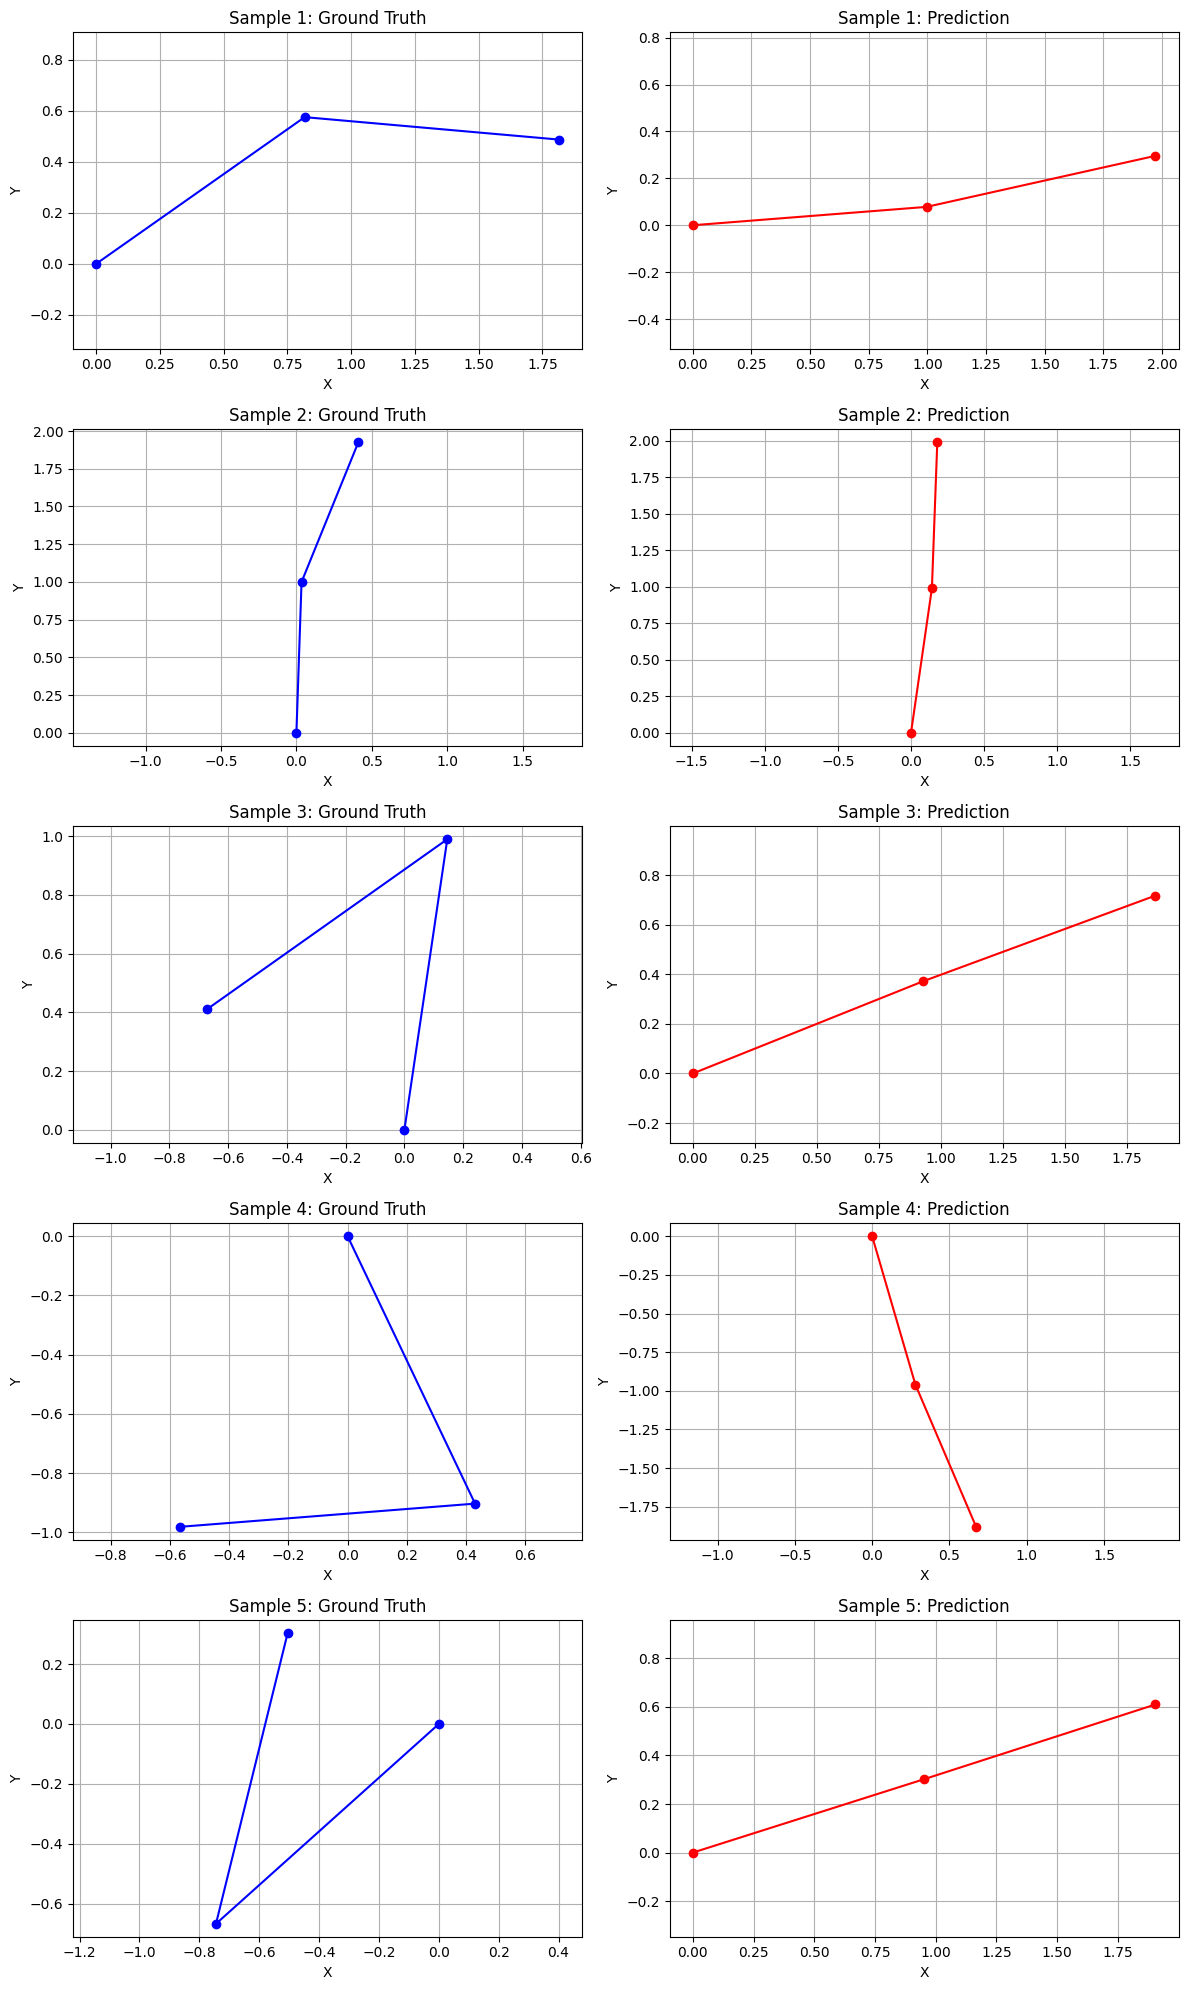

In [ ]:

# Calculate Mean Absolute Error
mae = np.mean(np.abs(y_test - y_pred))
print(f"Mean Absolute Error: {mae}")

# Plot some sample predictions
num_samples_to_plot = 5
sample_indices = np.random.choice(len(x_test), num_samples_to_plot, replace=False)

plt.figure(figsize=(12, 4*num_samples_to_plot))
for i, idx in enumerate(sample_indices, 1):
    plt.subplot(num_samples_to_plot, 2, 2*i-1)
    plt.plot([0, a1*np.cos(y_test[idx, 0]), a1*np.cos(y_test[idx, 0]) + a2*np.cos(np.sum(y_test[idx]))],
             [0, a1*np.sin(y_test[idx, 0]), a1*np.sin(y_test[idx, 0]) + a2*np.sin(np.sum(y_test[idx]))], 'b-o', label='Ground Truth')
    plt.title(f"Sample {i}: Ground Truth")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis('equal')
    plt.grid(True)

    plt.subplot(num_samples_to_plot, 2, 2*i)
    plt.plot([0, a1*np.cos(y_pred[idx, 0]), a1*np.cos(y_pred[idx, 0]) + a2*np.cos(np.sum(y_pred[idx]))],
             [0, a1*np.sin(y_pred[idx, 0]), a1*np.sin(y_pred[idx, 0]) + a2*np.sin(np.sum(y_pred[idx]))], 'r-o', label='Prediction')
    plt.title(f"Sample {i}: Prediction")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis('equal')
    plt.grid(True)

plt.tight_layout()
plt.show()
